# Exam June 2025 problem 1 


# problem 2


In [32]:
'''
Maximum Points = 14
In this problem we have data consisting of user behavior on a website. The pages of the website are
just numbers in the dataset 0, 1, 2, . . . and each row consists of a user, a source and a destination
page. This signifies that the user was on the source page and clicked a link leading them to the
destination page. The goal is to improve the user experience by decreasing load time of the next
page visited, as such we need a good estimate for the next site likely to be visited. We will model
this using a homogeneous Markov chain, each row in the data-file then corresponds to a single
realization of a transition.
1. [3p] Load the data in the file data/websites.csv and construct a matrix of size n_pages
x n_pages which is the maximum likelihood estimate of the true transition matrix for the
Markov chain. Here the ordering of the states are exactly the ones in the data-file, that is
page 0 has index 0 in the matrix.
2. [4p] A page loads in Exp(3) (Exponentially distributed with mean 1/3) seconds if not preloaded
and loads with Exp(20) (Exponentially distributed with mean 1/20) seconds if preloaded and
we only preload the most likely next site. Given that we start in page 8 simulate 10000 load
times from page 1 (that is, only a single step), store the result in the variable indicated in
the cell. Repeat the experiment but this time preload the two most likely pages and store the
result in the indicated variable.
3. [3p] Compare the average (empirical) load time from part 2 with the theoretical one of no
pre-loading. Does the load time improve, how did you come to this conclusion? (Explain in
the free text field).
4. [4p] Calculate the stationary distribution of the Markov chain and calculate the expected load
time with respect to the stationary distribution.

'''
import numpy as np 
import pandas as pd 



# Part 1: 3 points
# Load the data from the file data/websites.csv and estimate the transition matrix of the Markov chain
# Store the estimated transition matrix in the variable problem2_transition_matrix below

df = pd.read_csv("data/websites.csv")
ny_df = df.drop(columns = 'user')
ny_df = np.array(ny_df)

mymatrix = np.zeros((10,10))

for x in range(10):
    for i in ny_df:
        if i[0] == x:
            mymatrix[i[0], i[1]] = mymatrix[i[0], i[1]] +1

    mymatrix[x, ] = mymatrix[x,]/sum(mymatrix[x,])


problem2_transition_matrix = mymatrix # A numpy array of shape (problem2_n_states, problem2_n_states)
# Store the number of states in the variable problem2_n_states below
problem2_n_states = 10



# Part 2: 4 points
# Simulate the website load times for the next page of 10000 users that are currently on page 8 (recall indexing starts at 0) when we only preload the␣
# most likely page.
# Store the simulated page load times in the variable problem2_page_load_times_top below
lista = np.zeros(100000)
lista_2 = np.zeros(100000)

for i in range(len(lista)):
    lista[i] = 0.11904761904761904 * np.random.exponential(3)

grej = 0.16666667 * 0.14285714

for i in range(len(lista_2)):
    lista_2[i] = grej * np.random.exponential(20)

print(mymatrix)

problem2_page_load_times_top = lista # A numpy array of shape (10000,)
# Repeat the simulation of load times for the next page of 10000 users that are 
# currently on page 8 when we preload the two most likely pages.
# Store the simulated page load times in the variable problem2_page_load_times_two below
problem2_page_load_times_two = XXX # A numpy array of shape (10000,)


[[0.         0.26506024 0.         0.12048193 0.04819277 0.01204819
  0.08433735 0.10843373 0.15662651 0.20481928]
 [0.1015625  0.         0.09375    0.2109375  0.015625   0.234375
  0.125      0.140625   0.03125    0.046875  ]
 [0.20652174 0.13043478 0.         0.11956522 0.15217391 0.17391304
  0.02173913 0.         0.04347826 0.15217391]
 [0.00943396 0.09433962 0.19811321 0.         0.0754717  0.06603774
  0.14150943 0.19811321 0.         0.21698113]
 [0.18055556 0.16666667 0.11111111 0.13888889 0.         0.09722222
  0.16666667 0.05555556 0.02777778 0.05555556]
 [0.00980392 0.18627451 0.02941176 0.05882353 0.15686275 0.
  0.15686275 0.01960784 0.17647059 0.20588235]
 [0.03478261 0.06086957 0.17391304 0.07826087 0.         0.13913043
  0.         0.13913043 0.23478261 0.13913043]
 [0.16129032 0.05376344 0.01075269 0.12903226 0.08602151 0.03225806
  0.21505376 0.         0.17204301 0.13978495]
 [0.14285714 0.11904762 0.14285714 0.04761905 0.07142857 0.16666667
  0.08333333 0.0952381

NameError: name 'XXX' is not defined

# problem 3


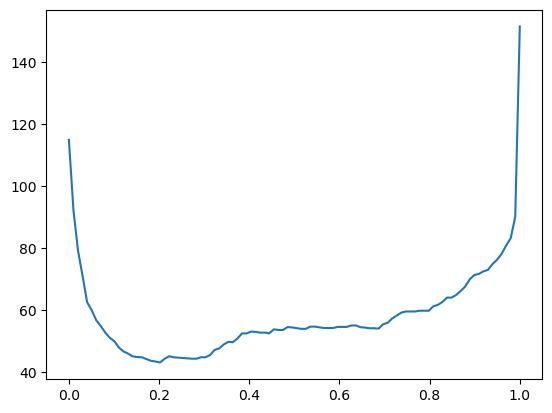

In [20]:
# RUN THIS CELL TO GET THE DATA
# We start by loading the data
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
PROBLEM3_DF = pd.read_csv('data/fraud.csv')
Y = PROBLEM3_DF['Class'].values
X = PROBLEM3_DF[['V%d' % i for i in range(1,5)]+['Amount']].values
# We will split the data into training, testing and validation sets
from Utils import train_test_validation
PROBLEM3_X_train, PROBLEM3_X_test, PROBLEM3_X_val, PROBLEM3_y_train, PROBLEM3_y_test, PROBLEM3_y_val = train_test_validation(X,Y,shuffle=True,random_state=1)
# From this we will train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(PROBLEM3_X_train,PROBLEM3_y_train)


PROBLEM3_y_pred_proba_val = lr.predict_proba(PROBLEM3_X_val)[:,1]
PROBLEM3_y_true_val = PROBLEM3_y_val
PROBLEM3_y_pred_proba_test = lr.predict_proba(PROBLEM3_X_test)[:,1]
PROBLEM3_y_true_test = PROBLEM3_y_test



# Part 1: 3 points
# Implement the following function that calculates the cost of a binary classifier according to
# the specification in the problem statement
# See the comments inside the function for details of the parameters
def cost(y_true,y_predict_proba,threshold):
    y_pred = [1 if x > threshold else 0 for x in y_predict_proba]
    accumulator = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and  y_pred[i] == 1:
            accumulator += 100
        elif y_true[i] == 1 and  y_pred[i] == 0:
            accumulator += 600
        elif  y_true[i] == 0 and  y_pred[i] == 1:
            accumulator += 120

    accumulator = accumulator/len(y_true)
    return accumulator
# y_true is a numpy array of shape (n_samples,) with binary labels
# y_predict_proba is a numpy array of shape (n_samples,) with predicted␣
# probabilities
# threshold is a float between 0 and 1

# When returning the cost, you should return the average cost per sample
# thus it should be a value
 # A float
# Provide the code below to plot the cost as a function of the threshold
# using the validation data, specifically the arrays PROBLEM3_y_true_val and 
# PROBLEM3_y_pred_proba_val.
# The plot should be between 0 and 1 with 0.01 increments
# The y-axis should be the cost and the x-axis should be the threshold

x_axis = np.linspace(0,1, 100)
y_axis = [cost(PROBLEM3_y_true_val, PROBLEM3_y_pred_proba_val, x_axi) for x_axi in x_axis]
plt.plot(x_axis, y_axis)
plt.show()
